### Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1. Как критики относятся к спортивным играм?

2. Критикам нравятся больше игры на PC или на PS4?

3. Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;

выберите пороговый уровень статистической значимости;

опишите полученные результаты статистического теста.


#### 1. Как критики относятся к спортивным играм?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy. stats import f_oneway

import re
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

nltk.download('omw-1.4')
nltk.download('wordnet')

from pylab import rcParams
rcParams['figure.figsize'] = 11,7

[nltk_data] Downloading package omw-1.4 to C:\Users\Johan.DESKTOP-53JN
[nltk_data]     TRO.000\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Johan.DESKTOP-53JN
[nltk_data]     TRO.000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# отбор нужных признаков
df = df[['Platform', 'Genre', 'Critic_Score', 'Critic_Count']]
df.head()

,Platform,Genre,Critic_Score,Critic_Count
0,Wii,Sports,76.0,51.0
1,NES,Platform,NaN,NaN
2,Wii,Racing,82.0,73.0
3,Wii,Sports,80.0,73.0
4,GB,Role-Playing,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16719 non-null  object 
 1   Genre         16717 non-null  object 
 2   Critic_Score  8137 non-null   float64
 3   Critic_Count  8137 non-null   float64
dtypes: float64(2), object(2)
memory usage: 522.6+ KB


In [5]:
# приведем Critic_Count к типу Int64
df['Critic_Count'] = df['Critic_Count'].astype('Int64')

In [6]:
df_desc = df.describe()
df_desc

,Critic_Score,Critic_Count
count,8137.000000,8137.000000
mean,68.967679,26.360821
std,13.938165,18.980495
min,13.000000,3.000000
25%,60.000000,12.000000
50%,71.000000,21.000000
75%,79.000000,36.000000
max,98.000000,113.000000


In [7]:
# удалю строки без оценок критиков 
#  при этом также потеряю две строки без указания жанра. 
df = df.dropna()
df.head()

,Platform,Genre,Critic_Score,Critic_Count
0,Wii,Sports,76.0,51
2,Wii,Racing,82.0,73
3,Wii,Sports,80.0,73
6,DS,Platform,89.0,65
7,Wii,Misc,58.0,41


In [8]:
critic_ = df[['Genre', 'Critic_Score', 'Critic_Count']].groupby('Genre').sum()
critic_

,Critic_Score,Critic_Count
Genre,,
Action,125929.0,52506
Adventure,21102.0,7143
Fighting,28310.0,11415
Misc,34842.0,11262
Platform,33825.0,11778
Puzzle,15103.0,4549
Racing,50429.0,17087
Role-Playing,53545.0,23945
Shooter,66251.0,33616


In [9]:
critic_.describe()

,Critic_Score,Critic_Count
count,12.000000,12.000000
mean,46765.833333,17874.833333
std,32595.595516,13967.810506
min,15103.000000,4549.000000
25%,23558.000000,8290.750000
50%,34333.500000,11596.500000
75%,56721.500000,24236.250000
max,125929.000000,52506.000000


<AxesSubplot:title={'center':'Суммарные баллы и количества оценок критиков по жанрам'}, xlabel='Жанры', ylabel='Количество баллов и оценок'>

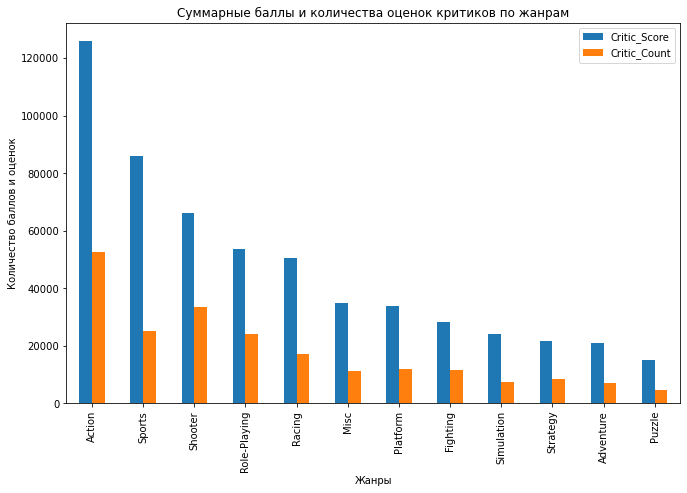

In [10]:
critic_.sort_values(by='Critic_Score', ascending=False).plot(kind='bar', 
                                                                  title='Суммарные баллы и количества оценок критиков по жанрам',
                                                                  xlabel='Жанры',
                                                                  ylabel='Количество баллов и оценок')

In [11]:
#  Из графика видно, что спортивные игры представляют значительный интерес для критиков.
#  Не самый высокий, уступая только экшн, но, опережая остальные жанры.
#  Причем, спортивные игры, на первый взгляд, оцениваются критиками выше, чем остальные игры.

#####  H0:  Оценки критиков  спортивных игр на уровне среднего
##### H1: Оценки критиков спортивных игр выше среднего

In [12]:
df_Sports = df[df['Genre'] == 'Sports']
df_Sports;

In [13]:
df_Sports.describe()

,Critic_Score,Critic_Count
count,1194.000000,1194.000000
mean,71.968174,21.030151
std,13.878433,13.663692
min,19.000000,4.000000
25%,64.000000,10.000000
50%,75.000000,18.000000
75%,82.000000,29.000000
max,98.000000,75.000000


In [14]:
sport_mean = df_Sports['Critic_Score'].mean()

In [15]:
# Проведем t-тест

alpha = 0.05
stat, pvalue = stats.ttest_1samp(df_Sports['Critic_Score'], (df_desc.at['mean','Critic_Score']), alternative='greater')

# аргумент popmean взят из df_desc

print(f'Средняя оценка спортивных игр {sport_mean:.3f}')

print(f'Статистика = {stat:.3f}, pvalue = {pvalue:.6f}')

if pvalue > alpha: 
    print('Оценки критиков спортивных игр на уровне среднего')
else:
    print('Отклоняем нулевую гипотезу, Оценки критиков спортивных игр, вероятно, выше среднего')

Средняя оценка спортивных игр 71.968
Статистика = 7.471, pvalue = 0.000000
Отклоняем нулевую гипотезу, Оценки критиков спортивных игр, вероятно, выше среднего


#### 2. Критикам нравятся больше игры на PC или на PS4?

In [16]:
df_pc_ps4 = df[(df['Platform'] == 'PC') | (df['Platform'] == 'PS4')]
df_pc_ps4

,Platform,Genre,Critic_Score,Critic_Count
42,PS4,Action,97.0,66
77,PS4,Sports,82.0,42
85,PC,Simulation,86.0,75
92,PS4,Shooter,83.0,39
94,PS4,Sports,85.0,41
...,...,...,...,...
16644,PC,Strategy,51.0,8
16696,PC,Action,80.0,20
16700,PC,Shooter,61.0,12
16706,PC,Strategy,60.0,12


In [17]:
df_pc_ps4.groupby('Platform').mean()

,Critic_Score,Critic_Count
Platform,,
PC,75.928671,27.92028
PS4,72.091270,38.968254


In [18]:
df_pc_ps4.groupby('Platform').var()

,Critic_Score,Critic_Count
Platform,,
PC,124.786222,307.409602
PS4,155.900003,555.034845


<AxesSubplot:xlabel='Platform', ylabel='Critic_Score'>

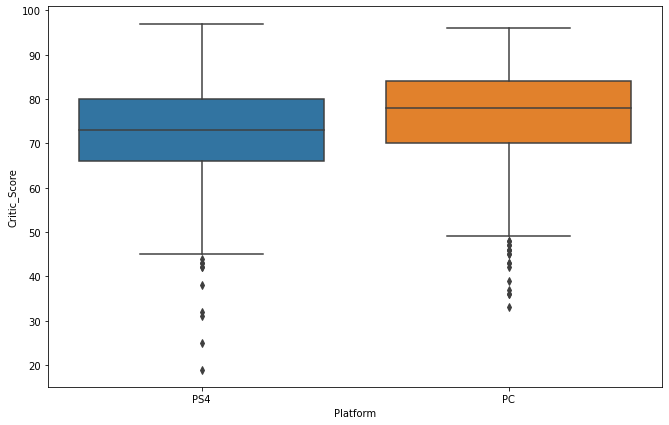

In [19]:
# визуализируем с помощью boxplot

box_df = df_pc_ps4['Platform'].value_counts().sort_values(ascending=False).index.values

sns.boxplot(x='Platform', y='Critic_Score', data = df_pc_ps4[df_pc_ps4['Platform'].isin(box_df)])

#####  H0:  Средние оценки критиков  PC - игр равны средним оценкам PS4 - игр
##### H1: Средние оценки PC - игр выше средних оценок PS4 - игр

In [20]:
df_pc = df[(df['Platform'] == 'PC')][['Critic_Score']]

df_ps4 = df[(df['Platform'] == 'PS4')][['Critic_Score']]

In [21]:
alpha = 0.05
stat, p = stats.ttest_ind(df_pc, df_ps4)

print(f'Статистика = {stat}, pvalue = {pvalue}')
if pvalue > alpha:
    print('Не отклоняем нулевую гипотезу, Средние оценки критиков PC - игр равны средним оценкам PS4 - игр')
else:
    print('Отклоняем нулевую гипотезу, Средние оценки PC - игр выше средних оценок PS4 - игр')

Статистика = [4.54411246], pvalue = 7.690444376155284e-14
Отклоняем нулевую гипотезу, Средние оценки PC - игр выше средних оценок PS4 - игр


#### 3. Критикам больше нравятся стрелялки или стратегии?

In [22]:
# df_sh_st = df[(df['Genre'] == 'Shooter') | (df['Genre'] == 'Strategy')][['Platform', 'Critic_Score']]
# df_sh_st

In [23]:
df_shooter = df[df['Genre'] == 'Shooter'][['Critic_Score']]
df_shooter.describe()

,Critic_Score
count,944.000000
mean,70.181144
std,14.552571
min,22.000000
25%,61.000000
50%,73.000000
75%,81.000000
max,97.000000


In [24]:
df_strategy = df[df['Genre'] == 'Strategy'][['Critic_Score']]
df_strategy.describe()

,Critic_Score
count,302.000000
mean,72.086093
std,11.828475
min,35.000000
25%,65.000000
50%,73.000000
75%,80.000000
max,94.000000


In [25]:
# применю для разнообразия метод доверительных интервалов
ci_lower_shooter, ci_upper_shooter = stats.norm.interval(alpha=0.9, loc=np.mean(df_shooter), scale=stats.sem(df_shooter))
print(f'Мы уверены на 90%,\
что истинное среднее значение оценок стрелялок находится в диапазоне между {ci_lower_shooter} и {ci_upper_shooter}')

Мы уверены на 90%,что истинное среднее значение оценок стрелялок находится в диапазоне между [69.40206597] и [70.96022217]


In [26]:
ci_lower_strategy, ci_upper_strategy = stats.norm.interval(alpha=0.9, loc=np.mean(df_strategy), scale=stats.sem(df_strategy))
print(f'Мы уверены на 90%,\
что истинное среднее значение оценок стратегий находится в диапазоне между {ci_lower_strategy} и {ci_upper_strategy}')

Мы уверены на 90%,что истинное среднее значение оценок стратегий находится в диапазоне между [70.96651936] и [73.20566607]


##### Доверительные интервалы "зацепились" своими крайними границами на уровне доверия 90%. При более высоком уровне, ДИ вообще налезут друг на друга. Можно сказать, что разница есть, но очень небольшая. Средние оценки стратегических игр выше стрелялок. Учитывая размахи оценок в 60-70 баллов, можно задаться вопросом, насколько разница средних в 2 балла важна? 

### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1. Приведите весь текст к нижнему регистру;

2. Удалите мусорные символы;

3. Удалите стоп-слова;

4. Привидите все слова к нормальной форме;

5. Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df.Message)

names = tfidf.get_feature_names_out()

tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

Можете поэкспериментировать с параметрами TfidfVectorizer;

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указаниемфактического и предсказанного).


In [27]:
data = pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
data['Message'] = data['Message'].str.lower()
data

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [30]:
# прибрать все служебные символы
data['Message'] = data['Message'].apply(lambda x: re.sub('[\W_]+', ' ', x))
data

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Johan.DESKTOP-53
[nltk_data]     JNTRO.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# разберем строки на список слов и сравним с множеством стоп_слов, при совпадении удалим их
texts_splitted = [text.split() for text in data['Message']]
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in text if word not in stopwords_set] for text in texts_splitted]

In [33]:
# приведем к именительному падежу единственному числу (лемматизация)
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]
lemmatized_text;

In [34]:
# соберем коллекции(списки) слов во фразы
data['Message'] = [' '.join(row) for row in lemmatized_text]
data

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [37]:
# https://scikit-learn.ru/6-2-feature-extraction/
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
# names
tfidf_matrix.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X = tfidf_matrix 
y = data['Category']

In [43]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model.score(X_test, y_test)

0.958732057416268

In [46]:
# делаем прогноз на тестовой выборке
y_pred = model.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [47]:
confusion_matrix(y_test, y_pred)

array([[1445,    3],
       [  66,  158]], dtype=int64)

In [48]:
# корректное сообщение ошибочно 3 раза попало в спам, а спам 66 раз попал в корректные

In [50]:
data_new = data.iloc[y_test.index]
data_new= pd.DataFrame(data_new)
data_new['Calculate_Category']=y_pred
data_new

,Category,Message,Calculate_Category
3245,ham,squeeeeeze christmas hug u lik frndshp den hug...,ham
944,ham,also sorta blown couple time recently id rathe...,ham
1044,ham,mmm thats better got roast b better drink 2 go...,ham
2484,ham,mm kanji dont eat anything heavy ok,ham
812,ham,ring come guy costume gift future yowifes hint...,ham
...,...,...,...
2505,ham,hello boytoy made home constant thought love h...,ham
2525,spam,free entry 250 weekly comp send word win 80086...,spam
4975,ham,aiyo u poor thing u dun wan 2 eat u bathe already,ham
650,spam,1 000 cash 2 000 prize claim call09050000327 c...,spam


In [51]:
data_new[data_new['Calculate_Category'] != data_new['Category'] ]

,Category,Message,Calculate_Category
2952,ham,hey free call,spam
881,spam,reminder downloaded content already paid goto ...,ham
1961,spam,guess somebody know secretly fancy wanna find ...,ham
3864,spam,oh god found number glad text back xafter msg ...,ham
2575,spam,next amazing xxx picsfree1 video sent enjoy on...,ham
...,...,...,...
4543,spam,freemsg hi baby wow got new cam moby wanna c h...,ham
752,spam,important customer service announcement premier,ham
309,spam,themob check newest selection content game ton...,ham
495,ham,free call,spam
